In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'Transformed Image')

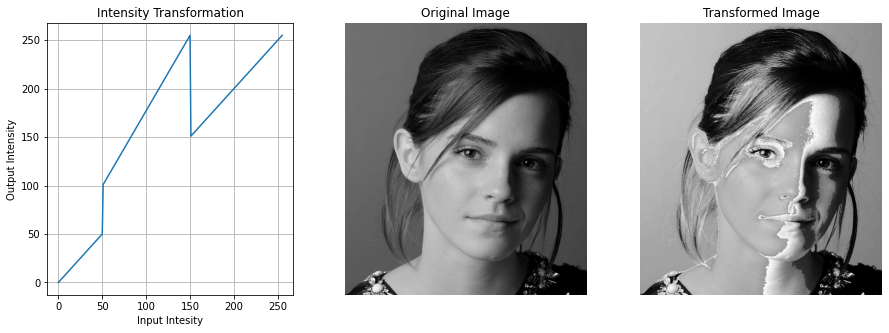

In [17]:
emma_img_gray = cv.imread(r"Images\emma_gray.jpg", cv.IMREAD_GRAYSCALE)

section_1 = np.linspace(0, 50, 51)
section_2 = np.linspace(101, 255, 100)
section_3 = np.linspace(151, 255, 105)

intensity_transform = np.concatenate((section_1, section_2, section_3), axis=0)

emma_img_gray_transformed = cv.LUT(emma_img_gray, intensity_transform)

fig, ax = plt.subplots(1, 3, figsize=(15, 5))

ax[0].plot(intensity_transform)
ax[0].set_xlabel("Input Intesity")
ax[0].set_ylabel("Output Intensity")
ax[0].set_title("Intensity Transformation")
ax[0].grid()

ax[1].imshow(emma_img_gray, cmap = "gray")
ax[1].axis("off")
ax[1].set_title("Original Image")

ax[2].imshow(emma_img_gray_transformed, cmap = "gray")
ax[2].axis('off')
ax[2].set_title("Transformed Image")
